# Objectifs


-La préparation des données a pour but de charger les données, de les formater pour les rendre analysables et de filtrer les valeurs incohérentes.(plages horaires, de régularité temporelle. et de remplissage des données manquantes)

-L’exploration des données (la série est-elle stationnaire ? La stationnarité veut dire que les statistiques de la série temporelle n’évoluent pas.,La série a-t-elle des périodicités? Périodicité journalière, hebdomadaire, annuelle…,La série dépend-elle d’autres séries temporelles?)

-Analyse des données(le nettoyage des ‘mauvaises valeurs’, la prédiction, la détection d’événements anormaux (par exemple détection de fautes dans un équipement)

In [121]:
#%matplotlib notebook
import math                         # import a package
import numpy as np                  # import a package with specified name
from sklearn import linear_model    # import whole module
from os import mkdir, rmdir, path   # import a function
from inspect import getsourcelines 
import random
import string
import time
import pandas as pd
import urllib
import zipfile
import matplotlib.pyplot as plt     # for plots
import seaborn as sns               # for plots
import sys

#sns.set_palette("colorblind")
#color_blind_list = sns.color_palette("colorblind", 8)

#  Introduction: Pandas, Matplotlib, etc.

On utilise la base de données Individual household electric power consumption Data Set .
Pour cela utiliser les commandes ci-dessous :

## Question 1:
Chargement de la base de données. 

a) Telechargement des données via web

c'est un peu long donc passez directement à la cellule suivante

In [122]:
"""
# download part si necessaire
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

# testing existence of file:

if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)

# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
"""

"\n# download part si necessaire\nurl = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'\nfilename = 'household_power_consumption'\nzipfilename = filename + '.zip'\nLocation = url + zipfilename\n\n# testing existence of file:\n\nif sys.version_info >= (3, 0):\n    if not(path.isfile('zipfilename')):\n        urllib.request.urlretrieve(Location, zipfilename)\nelse:\n    if not(path.isfile('zipfilename')):\n        urllib.urlretrieve(Location, zipfilename)\n\n# unzip part\nzip = zipfile.ZipFile(zipfilename)\nzip.extractall()\n"

b) chargement du fichier source extrait

household_power_consumption.txt

In [123]:
#TBD
df = pd.read_csv('household_power_consumption.txt', sep=";")
print(df)



               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

/var/folders/60/bfzc0kqx1l54g6mx713k6cx80000gn/T/ipykernel_6767/511551390.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', sep=";")




c) Détecter et dénombrer le nombre de lignes ayant des valeurs manquantes.


nb: .isna() ou isnull()

In [124]:
#TBD
count_null = df.isnull().sum()
print(df)



               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

d) De quoi parle ce dataset ?

In [125]:
print(df)

               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

## Question 2:
 Utiliser ```to_datetime``` et ```set_index``` pour créer un Data Frame dont l'index est dans un format "date"  (on prendra garde au format des dates internationales qui diffère du format français).

Construiser les colonnes Date et Time pour cela

In [1]:
df.head()

NameError: name 'df' is not defined

In [127]:
# TBD

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],infer_datetime_format=True, dayfirst = True)
df = df.set_index('Datetime')
#df = df.drop(['Date','Time'], axis=1)





## Question 3:

Remplacer/corriger les nans et caracteres spéciaux ('?')

- Identifier la/les plages horraires de pertes d'information


In [128]:
# TBD

df[df['Sub_metering_3'].isna()].index
list(df[df['Sub_metering_3'].isna()].index)


[Timestamp('2006-12-21 11:23:00'),
 Timestamp('2006-12-21 11:24:00'),
 Timestamp('2006-12-30 10:08:00'),
 Timestamp('2006-12-30 10:09:00'),
 Timestamp('2007-01-14 18:36:00'),
 Timestamp('2007-01-28 17:13:00'),
 Timestamp('2007-02-22 22:58:00'),
 Timestamp('2007-02-22 22:59:00'),
 Timestamp('2007-03-25 17:52:00'),
 Timestamp('2007-04-28 00:21:00'),
 Timestamp('2007-04-28 00:22:00'),
 Timestamp('2007-04-28 00:23:00'),
 Timestamp('2007-04-28 00:24:00'),
 Timestamp('2007-04-28 00:25:00'),
 Timestamp('2007-04-28 00:26:00'),
 Timestamp('2007-04-28 00:27:00'),
 Timestamp('2007-04-28 00:28:00'),
 Timestamp('2007-04-28 00:29:00'),
 Timestamp('2007-04-28 00:30:00'),
 Timestamp('2007-04-28 00:31:00'),
 Timestamp('2007-04-28 00:32:00'),
 Timestamp('2007-04-28 00:33:00'),
 Timestamp('2007-04-28 00:34:00'),
 Timestamp('2007-04-28 00:35:00'),
 Timestamp('2007-04-28 00:36:00'),
 Timestamp('2007-04-28 00:37:00'),
 Timestamp('2007-04-28 00:38:00'),
 Timestamp('2007-04-28 00:39:00'),
 Timestamp('2007-04-

- Trouver une methodes pour remplacer ou enlever les lignes des valeurs manquantes



In [129]:
# TBD
df.dropna(axis=0, inplace=True)
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

- Mettre les colonnes numeriques au format float

sauf Date et Time

In [130]:
df.columns


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [131]:
# TBD
import logging

for col in df.columns: 
    try:
        df[col] = df[col].astype('float')
    except ValueError:
        continue
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


Creer une colonne "jds" (numero du jour de la semaine) et calculer les valeurs moyennes par jour de la semaine

In [132]:
# TBD

jds =df.index.weekday
df.groupby(jds).mean()




,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
0,0.999546,0.115814,241.004068,4.234526,0.832367,0.878282,6.224349
1,1.069796,0.118368,240.841796,4.535132,0.786360,1.343616,6.412642
2,1.082588,0.119945,240.884047,4.586032,1.058772,1.734325,6.384388
3,0.981809,0.114404,240.855008,4.158418,0.799535,0.758639,6.030598
4,1.043394,0.118583,240.835616,4.417107,0.874717,0.998041,6.759051
5,1.248335,0.142303,240.593620,5.296364,1.726473,1.492205,7.492516
6,1.220188,0.137090,240.860977,5.185428,1.795541,1.895704,5.914105


#### On ne s'interresse qu'à la variable active power

In [133]:
df=pd.DataFrame(df['Global_active_power'])
df.head()

,Global_active_power
Datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


## Question 4:
Afficher le graphique des moyennes journalières entre le 1er janvier et le 30 avril 2007.  On pourra utiliser en plus de ```matplotlib``` le package ```seaborn``` pour améliorer le rendu visuel.
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

Proposer une cause expliquant la consommation fin février et début avril.


nb: Pensez à changer le format des colonnes, vous comprenez qu'un moyenne ne se calcule qu'avec des données numeriques



<AxesSubplot:xlabel='Datetime'>

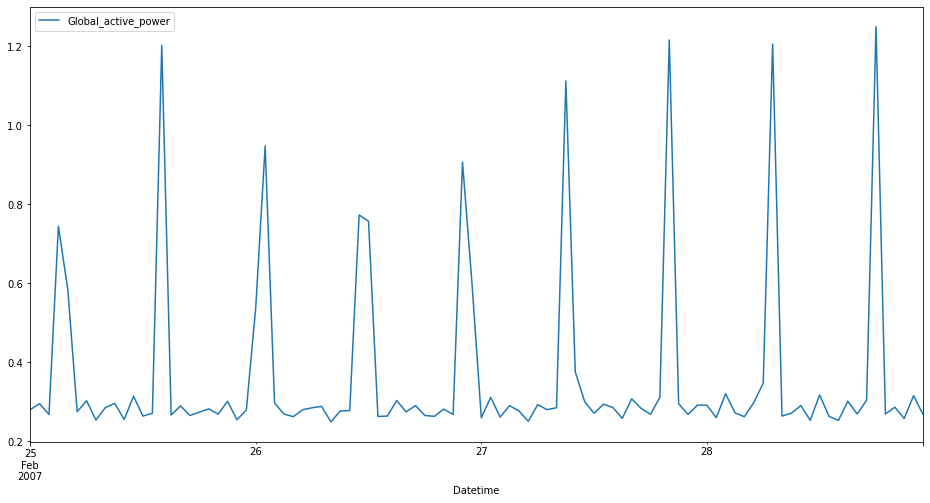

In [148]:
df2 =df.resample('d').mean()

df2.loc['2007-01-01':'2007-02-28'].plot(figsize=(16,8))

### PAUSE / Veille :


la série est-elle stationnaire ? 

La série a-t-elle des périodicités? 

Périodicité journalière, hebdomadaire, annuelle…

La série dépend-elle d’autres séries temporelles?


#### Tracer l'evolution de cette puissance electrique appellee par jour/semaine/mois pour repondre à cette question 

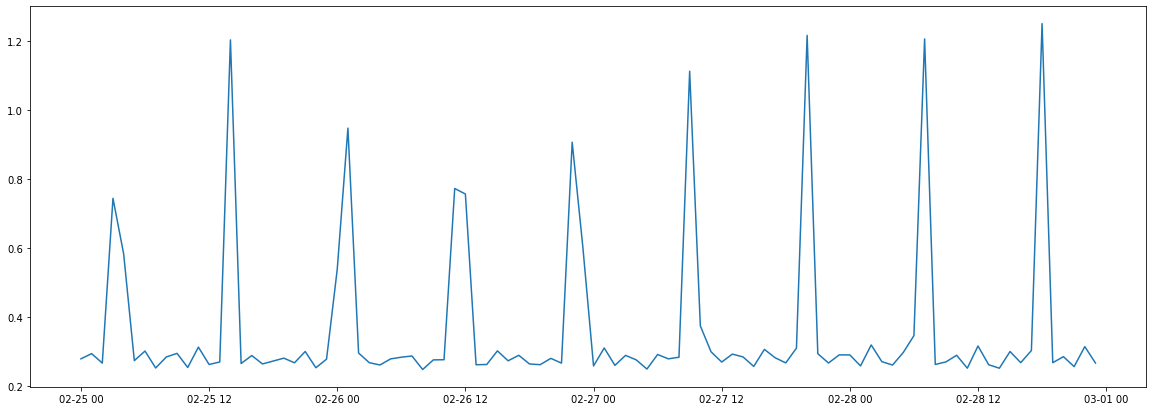

In [135]:
df =df.resample('h').mean()
df = df.loc['2007-02-25':'2007-02-28']
plt.plot(df)


## Question 5: 
Charger les données du fichier TG_STAID011249.txt avec ```pandas```, et ne garder que les colonnes ```DATE``` et ```TG```.


Diviser par 10 la colonne TG pour obtenir des températures en degrés Celsius.


Traiter les éléments de température aberrants comme des ```NaN```.

Ne conserver que les temperatures > -273.15 °C

In [194]:
df1=pd.read_csv('TG_STAID011249.txt',comment='#')
for col in df1.columns:
    df1.rename(columns={col:col.strip()}, inplace=True) 
print(df1.columns)
df1.head()

Index(['STAID', 'SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')


,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,50,0
1,11249,71642,19210302,46,0
2,11249,71642,19210303,46,0
3,11249,71642,19210304,31,0
4,11249,71642,19210305,95,0


In [195]:

df1['TG'] = df1['TG']/10
df1


,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,5.0,0
1,11249,71642,19210302,4.6,0
2,11249,71642,19210303,4.6,0
3,11249,71642,19210304,3.1,0
4,11249,71642,19210305,9.5,0
...,...,...,...,...,...
34878,11249,907149,20160827,26.6,0
34879,11249,907149,20160828,25.5,0
34880,11249,907149,20160829,20.6,0
34881,11249,907149,20160830,20.4,0


In [196]:
# TBD
df1.isna().sum()

STAID    0
SOUID    0
DATE     0
TG       0
Q_TG     0
dtype: int64

In [203]:
# TBD
aberants_values = df1.query('TG>= -273.15')
aberants_values

,STAID,SOUID,TG,Q_TG
DATE,,,,
1921-03-01,11249,71642,5.0,0
1921-03-02,11249,71642,4.6,0
1921-03-03,11249,71642,4.6,0
1921-03-04,11249,71642,3.1,0
1921-03-05,11249,71642,9.5,0
...,...,...,...,...
2016-08-27,11249,907149,26.6,0
2016-08-28,11249,907149,25.5,0
2016-08-29,11249,907149,20.6,0


# Question 6:

Créer un DataFrame des températures journalières entre le 1er janvier et le 30 avril 2007. 

Parser la colonne DATE et l'imposer en index pour realiser cette operation

In [205]:
# TBD
df1["DATE"] = pd.to_datetime(df1['DATE'] , format="%Y%m%d")
print(df1.columns)


Index(['STAID', 'SOUID', 'TG', 'Q_TG'], dtype='object')


In [206]:
# TBD
#df1.set_index('DATE', inplace=True)
df1

,STAID,SOUID,TG,Q_TG
DATE,,,,
1921-03-01,11249,71642,5.0,0
1921-03-02,11249,71642,4.6,0
1921-03-03,11249,71642,4.6,0
1921-03-04,11249,71642,3.1,0
1921-03-05,11249,71642,9.5,0
...,...,...,...,...
2016-08-27,11249,907149,26.6,0
2016-08-28,11249,907149,25.5,0
2016-08-29,11249,907149,20.6,0


Afficher sur un même graphique ces températures et la séries *Global_active_power*.

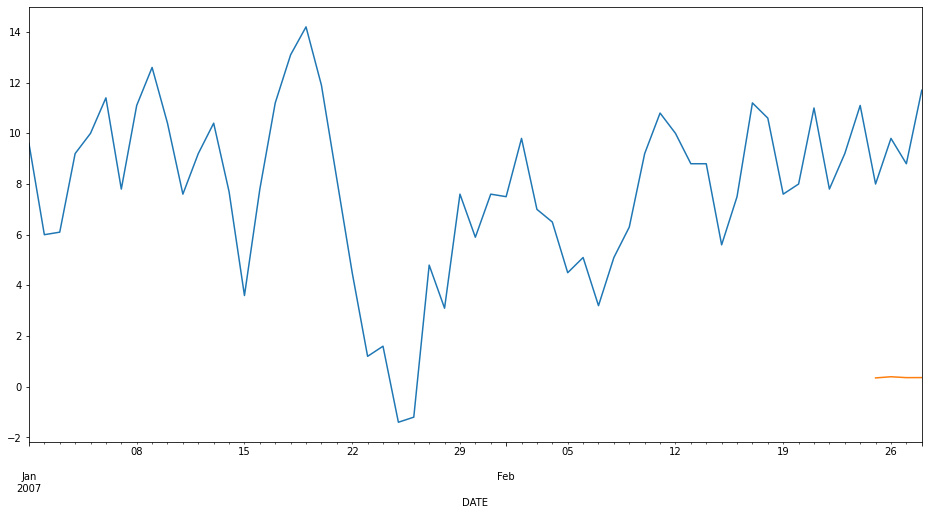

In [218]:
# TBD
temperature = df1.loc['2007':'2007-02-28']['TG']
temperature.plot(figsize=(16,8))
temperature =temperature.resample('d').mean()
df =df.resample('d').mean()
df = df.loc['2007':'2007-02-28']
plt.plot(df)

## Question 7:
On considère maintenant le jeu de données ```20080421_20160927-PA13_auto.csv```.


In [15]:
import pandas as pd
my_file ='20080421_20160927-PA13_auto.csv'

# skiprows remove the first line, so is the comment='#' option
polution_df = pd.read_csv(my_file, sep=';',
                          na_values="n/d",
                          converters={'heure': str},
                          skiprows=2,
                          names=["date", "heure", "NO2", "O3"],
                         )

# check issues with 24:00 several variants can be accepted without more details on the 
# way the dataset was created.
# https://www.tutorialspoint.com/python/time_strptime.htm

polution_df['heure'] = polution_df['heure'].replace('24', '0')
time_improved = pd.to_datetime(polution_df['date'] +
                               ' ' + polution_df['heure'] + ':00',
                               format='%d/%m/%Y %H:%M')


polution_df['DateTime'] = time_improved
del polution_df['heure']
del polution_df['date']

polution_ts = polution_df.set_index(['DateTime'])
polution_ts = polution_ts.sort_index()
polution_ts.head()


,NO2,O3
DateTime,,
2008-04-21 00:00:00,28.0,36.0
2008-04-21 01:00:00,13.0,74.0
2008-04-21 02:00:00,11.0,73.0
2008-04-21 03:00:00,13.0,64.0
2008-04-21 04:00:00,23.0,46.0


Proposer une visualisation de la pollution pour l'ozone sur la période d'étude.

<AxesSubplot:xlabel='DateTime'>

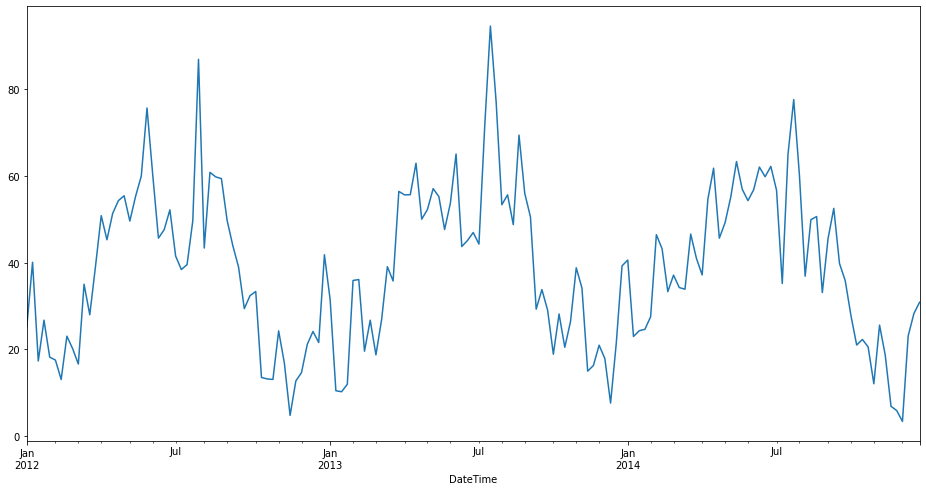

In [26]:
#TBD
polution_ts['O3'].resample('w').mean().loc['2012':'2015-01-2'].plot(figsize=(16,8))


# Question 8:
 Proposer une visualisation de la pollution la plus critique (les max) par année pour l'ozone et pour pour le
dioxyde d'azote.

<AxesSubplot:xlabel='DateTime'>

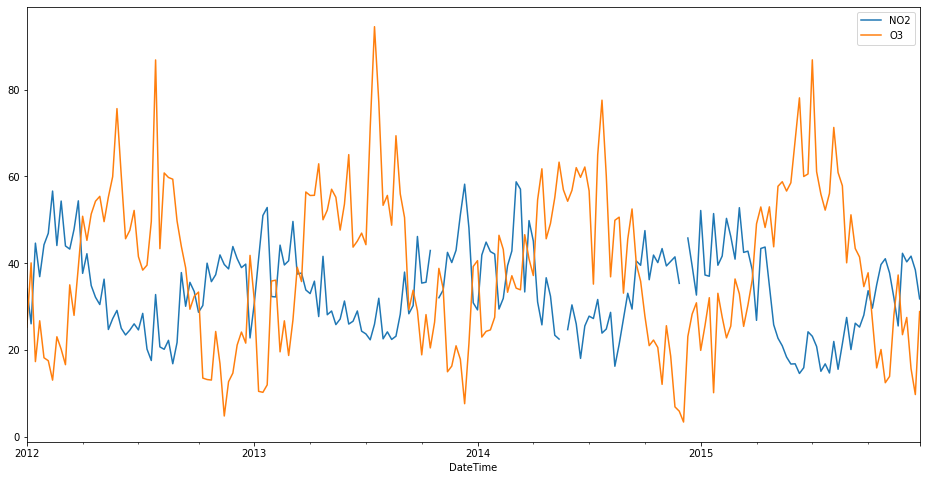

In [34]:
polution_ts.resample("W").mean().loc['2012':'2015'].plot(figsize=(16,8))


## Question 9:
Donner une représentation par semaine de la pollution. Quelles est la periode la plus polluée pour l'ozone, pour le dioxyde de souffre?

<AxesSubplot:xlabel='DateTime'>

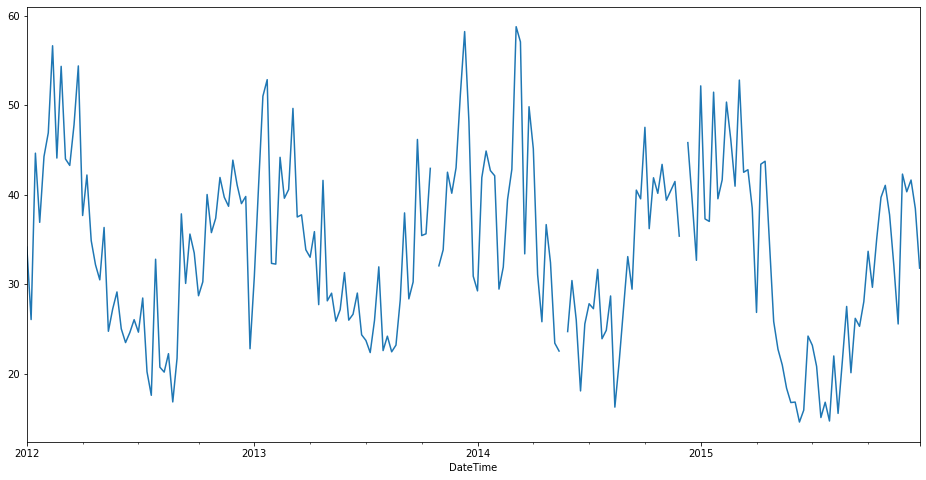

In [35]:
polution_ts["NO2"].resample("W").mean().loc['2012':'2015'].plot(figsize=(16,8))

/var/folders/60/bfzc0kqx1l54g6mx713k6cx80000gn/T/ipykernel_51366/949080395.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  polution_ts['semaine']=polution_ts.index.week


<AxesSubplot:xlabel='semaine'>

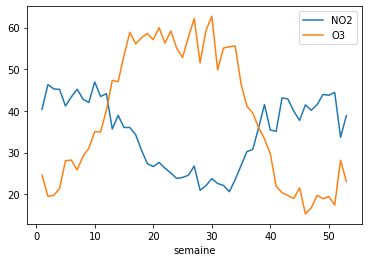

In [37]:
polution_ts['semaine']=polution_ts.index.week
polution_ts.groupby('semaine').mean().plot()


###:


la série est-elle stationnaire ? 
Périodique the same periode 

La série a-t-elle des périodicités? 

Périodicité journalière, hebdomadaire, annuelle…

La série dépend-elle d’autres séries temporelles?